# Exercise 4: Population data analysis

**Name**: Danil Gutak

**Student number**: 12215165

**Semester**: WS23

Please, first run the code below. It will import all modules and libraries for this exercise.

In [4]:
# necessary imports
import numpy as np
print("Numpy version: ", np.__version__)
from numpy import random
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]
print("Matplotlib version: ", matplotlib.__version__)
import pandas as pd
print("Pandas version: ", pd.__version__)
import sklearn
import sklearn.neighbors
print("sklearn version: ", sklearn.__version__)

Numpy version:  1.26.2
Matplotlib version:  3.8.2
Pandas version:  2.1.3
sklearn version:  1.4.0


## Part 1: Plotting and basic analysis of the dataset

Population data can be loaded as a pandas dataframe in the same way as the time series data in the earlier exercises. To load from a csv file, use the [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method again.

For plotting the raw data, the following approaches can be considered:
- Simple plot: If you have a single variable per individual, a good way to investigate the data is to plot the sorted values. You can sort an array with the [`numpy.sort`](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) method. For plotting, you can use a command similar to `ax.plot(data_sorted, '.')` to just plot the sequentially sorted values.
- Scatter plot: If you have multiple variables per individual in the dataset, you can generate a scatter plot by plotting one variable vs. another one. This is also possible with categorial data, the points will then be grouped into the categories!
- Line plots are best created with two `plot` commands: one to plot the actual lines, another one to plot the points, for example with a plotstyle 'bo' (`ax.plot(x, y, 'bo')`).
- Box plots are useful if you have a variable with multiple categories. The relevant documentation is at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html. You can also follow the example code given at the end of the documentation.

### Task 1: 
- Load your population dataset into a pandas dataframe and check the resulting dataframe (print).
- Experiment with different ways to plot your data and discuss their pros and cons for this dataset.
- Compute some summary statistics (mean, standard deviation, and if relevant, covariance or correlation coefficients). You can use either the numpy methods [`numpy.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html), [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html), or their pandas equivalents.

In [8]:
mydata = pd.read_csv("Pima Indians Diabetes Database.csv") 
print(mydata)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

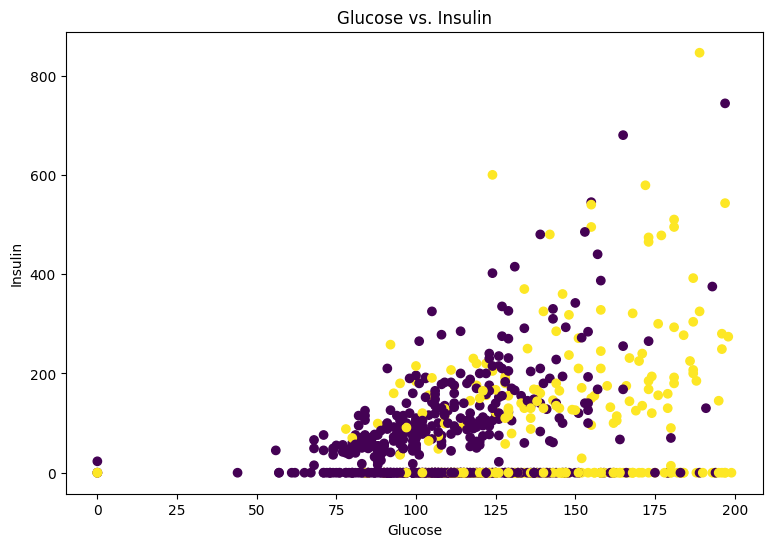

In [21]:
# plot glucose vs. insulin colored by diabetes with correlation line
plt.scatter(mydata['Glucose'], mydata['Insulin'], c=mydata['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Glucose vs. Insulin')
plt.show()



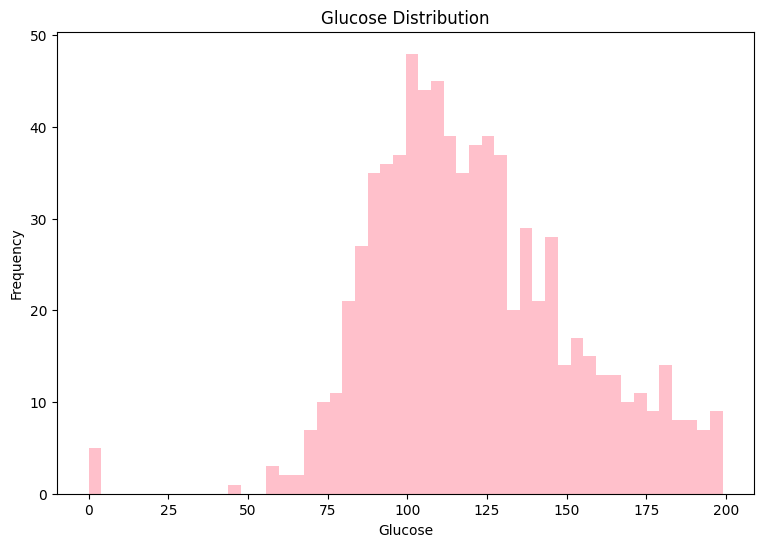

In [28]:
#plot glucose distribution 
plt.hist(mydata['Glucose'], bins=50, color='pink')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.show()

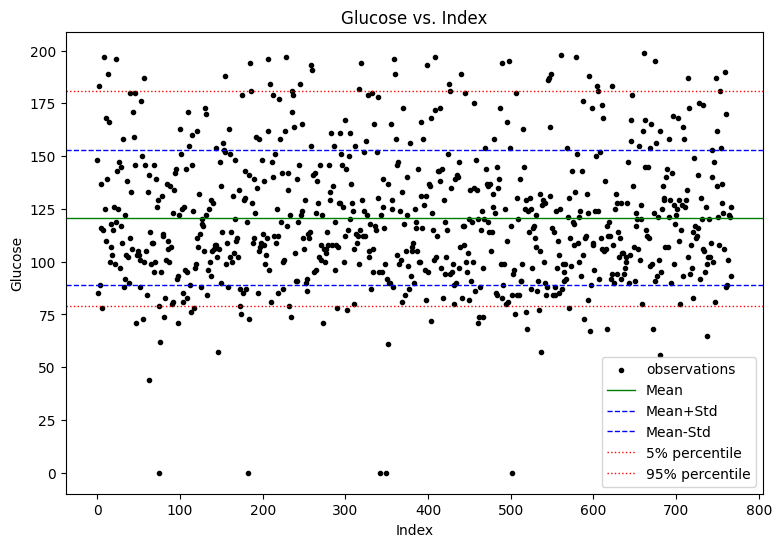

In [18]:
# plot glucose vs indexes with mean std and 5%  95% percentile as scatter plot with legend
plt.scatter(mydata.index, mydata['Glucose'], c='black', marker='.')
plt.xlabel('Index')
plt.ylabel('Glucose')
plt.title('Glucose vs. Index')
plt.axhline(mydata['Glucose'].mean(), color='green', linewidth=1)
plt.axhline(mydata['Glucose'].mean()+mydata['Glucose'].std(), color='blue', linestyle='--', linewidth=1)
plt.axhline(mydata['Glucose'].mean()-mydata['Glucose'].std(), color='blue', linestyle='--', linewidth=1)
plt.axhline(np.percentile(mydata['Glucose'], 5), color='red', linestyle=':', linewidth=1)
plt.axhline(np.percentile(mydata['Glucose'], 95), color='red', linestyle=':', linewidth=1)
plt.legend(['observations','Mean', 'Mean+Std', 'Mean-Std', '5% percentile', '95% percentile'])
plt.show()

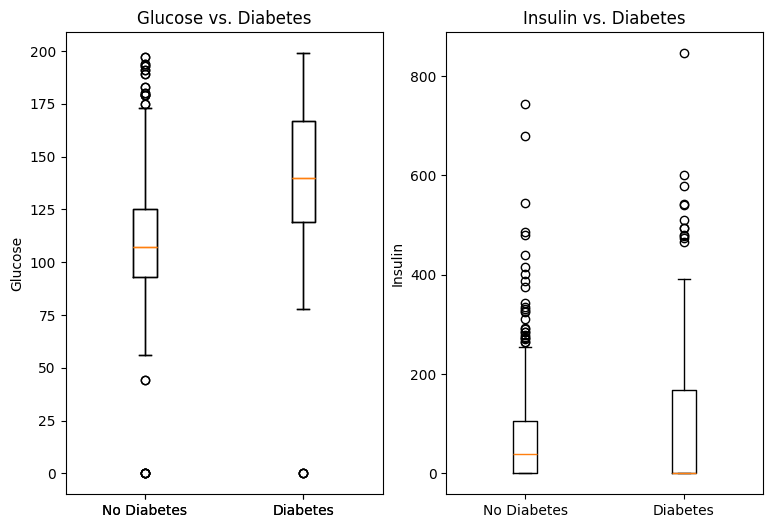

In [27]:
# plot 2 box subplots of glucose and insulin comparing diabetes and non-diabetes groups
plt.subplot(1,2,1)
plt.boxplot([mydata[mydata['Outcome']==0]['Glucose'], mydata[mydata['Outcome']==1]['Glucose']], labels=['No Diabetes', 'Diabetes'])
plt.ylabel('Glucose')
plt.title('Glucose vs. Diabetes')
plt.boxplot([mydata[mydata['Outcome']==0]['Glucose'], mydata[mydata['Outcome']==1]['Glucose']], labels=['No Diabetes', 'Diabetes'])
plt.ylabel('Glucose')
plt.title('Glucose vs. Diabetes')
plt.subplot(1,2,2)
# add insulin boxplot
plt.boxplot([mydata[mydata['Outcome']==0]['Insulin'], mydata[mydata['Outcome']==1]['Insulin']], labels=['No Diabetes', 'Diabetes'])
plt.ylabel('Insulin')
plt.title('Insulin vs. Diabetes')
plt.show()

### Discussion of the plots

**TODO**: 
As the most important feature, glucose is higher in diabetes group than non-diabetes group so it is a good predictor for diabetes so i decided to use it as the main reference in the graph. I created:


Scatter Plot for correlations - here i took two variables to see whether there is some assosiation between insulin and glucose. In this case it can be observed that there is certainly and correlation, however a lot of 0 values are making it hard to make any concrete conclusions. The benefit of ths plot is that it can be used to look at the different variable in terms of how they interact with each other in dataset giving an idea for future analysis. 


Histogram - Here i looked at glycose again to see basic distribution and notice that the distrubition is not exactly following the normal distribution and rather right scewed 


Scatter plot for summary statistics - here we can see distribution in terms of mean and std with boundaries and the values coming over them being outliers. it can give a perspective how data is distributed. However, plotting it by indexes gives a false sense of continuity and time movement while its not the case and every observation is made in the same point of time


Boxplot - here i decided to compare diabetes and non diabetes groups so i can see how the status is related to the glucose and insulin levels. This graphic can give a first impression whether there are differences between groups. And as it contains mean and std and outliers it gives better view than scatter plot as everything is packed in one line. The downside of boxplot is obviosly is that its hard to read for normal people as it requires some level of expertise to understand its contents.



### Summary statistics

In [29]:
# mean std and covariance and correlation of glucose and insulin
# i decided to use them because they are the most important statistical measures for this data and variables are important for diabetes
print("Mean of Glucose: ", mydata['Glucose'].mean())
print("Std of Glucose: ", mydata['Glucose'].std())
print("Mean of Insulin: ", mydata['Insulin'].mean())
print("Std of Insulin: ", mydata['Insulin'].std())
print("Covariance of Glucose and Insulin: ", mydata['Glucose'].cov(mydata['Insulin']))
print("Correlation of Glucose and Insulin: ", mydata['Glucose'].corr(mydata['Insulin']))


Mean of Glucose:  120.89453125
Std of Glucose:  31.97261819513622
Mean of Insulin:  79.79947916666667
Std of Insulin:  115.24400235133817
Covariance of Glucose and Insulin:  1220.9357989732728
Correlation of Glucose and Insulin:  0.3313571099202094


## Part 2: Density estimation

In this part, the objective is to perform density estimation on your dataset, comparing different methods to obtain an estimate of the density function.

The following methods should be compared:
- histogram
- naive estimator
- kernel density estimator with Gaussian or other kernel

**Histograms** can be plotted directly with `matplotlib`, using the function [`pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Also, if you create an `Axes` object with for example a call to `pyplot.subplots()`, you can use the equivalent [`Axes.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) method.

**Density estimation** should be performed with the package `sklearn`. A brief introduction to the methodology is given at https://scikit-learn.org/stable/modules/density.html (also check the examples at the end of that page). Briefly, the analysis and plotting should proceed as follows:
- Create a [`KernelDensity`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) with the desired kernel and bandwidth choice.
- Fit the kernel density estimator to your dataset by calling the [`KernelDensity.fit`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity.fit) method from the created `KernelDensity` object with your dataset as an argument. The `.fit` method assumes that the dataset is a 2-dimensional numpy array with the individuals in the rows and the variables measured per individual in the columns. When fitting a column of a pandas dataframe, the recommended method to transform the data into that form is to access it as `df['column'].to_numpy().reshape(-1, 1)`, where `df` is the variable name of the dataframe and `column` is the identifier of the column you want to use.
- For plotting, you have to evaluate the estimated density function with the method [`KernelDensity.score_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity.score_samples). The method takes the variable values at which the density function should be evaluated as arguments, which can for example be generated with the [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) method. This needs to be brought into the same format as for the fitting, which can be done for example by `np.linspace(start, stop).reshape(-1, 1)`. Also, `score_samples` returns the natural logarithm of the density function, so before plotting, the result of the `score_samples` method has to be passed through the [`numpy.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) function.
- Note that the density estimators in `sklearn` create a normalized estimate, similar to a probability distribution, where the area under the estimated function is equal to 1. To get the correct scale on the y-axis, you have to multiply the obtained values with the population size (number of individuals).

### Task 2: Density estimation
- Plot histograms of your dataset with different numbers of bins. Discuss the effect of the bin number on the result. What is a good choice for the number of bins, and which bin width does this correspond to?
- Perform density estimation with a naive estimator (implemented as `tophat` kernel in `sklearn`) and one other kernel function, for example a Gaussian kernel, and plot the result. Investigate the effect of the bandwidth parameter on the estimation result. What is a good choice for the bandwidth value for each of the kernels? If you do not indicate a bandwidth parameter when constructing the `KernelDensity` object, what does `sklearn` do?

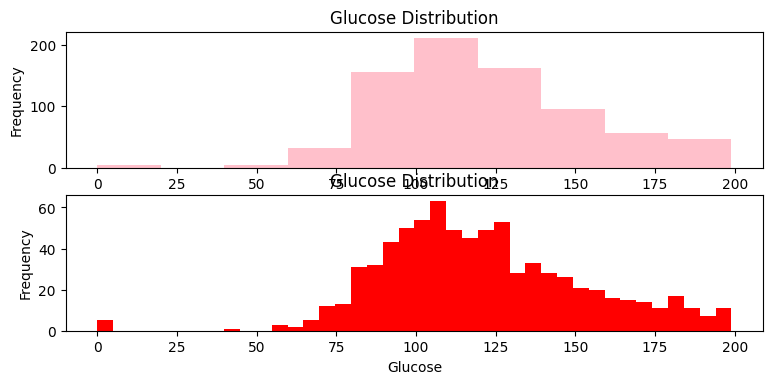

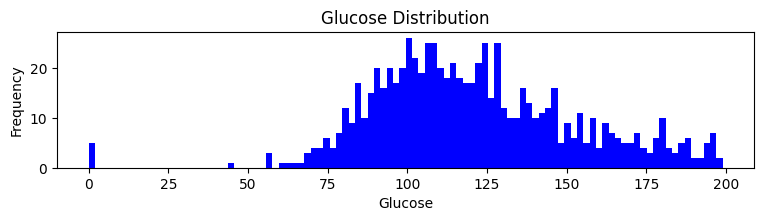

In [34]:
plt.subplot(3,1,1)
plt.hist(mydata['Glucose'], bins=10, color='pink')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.subplot(3,1,2)
plt.hist(mydata['Glucose'], bins=40, color='red')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.show()
plt.subplot(3,1,3)
plt.hist(mydata['Glucose'], bins=100, color='blue')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.show()
#The bin number affects the result by changing the frequency of the data. The more bins you have the more accurate the frequency is.
# 40 bins which seem to be the best version for this data corrspond to approximately 19.2 binwidth. 100 bins correspond to approximately 4.8 binwidth.



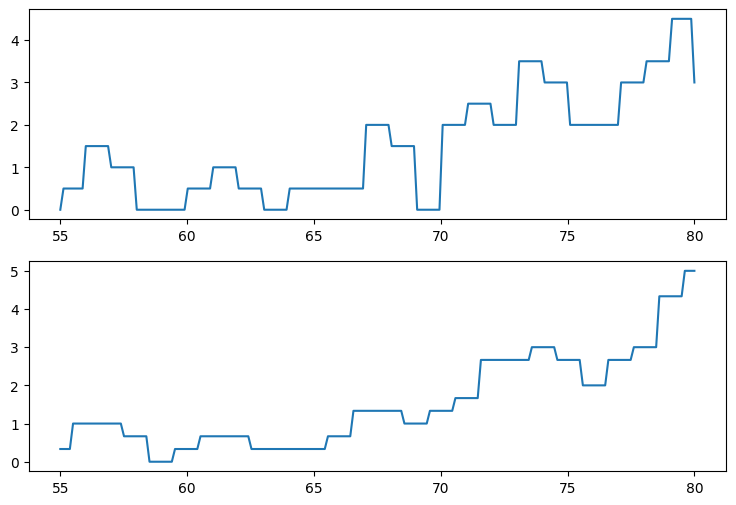

In [40]:
#Perform density estimation with a naive estimator (implemented as `tophat` kernel in `sklearn`)

X = mydata['Glucose'].to_numpy().reshape(-1, 1)
naive1 = sklearn.neighbors.KernelDensity(kernel='tophat')
naive1.fit(X)
grid = np.linspace(55, 80, num=200).reshape(-1, 1)
log_scores1 = naive1.score_samples(grid)

naive2 = sklearn.neighbors.KernelDensity(kernel='tophat', bandwidth=1.5)
naive2.fit(X)
log_scores2 = naive2.score_samples(grid)
fig, axs = plt.subplots(2, 1)
axs[0].plot(grid, np.exp(log_scores1)*len(mydata['Glucose']))
axs[1].plot(grid, np.exp(log_scores2)*len(mydata['Glucose']))


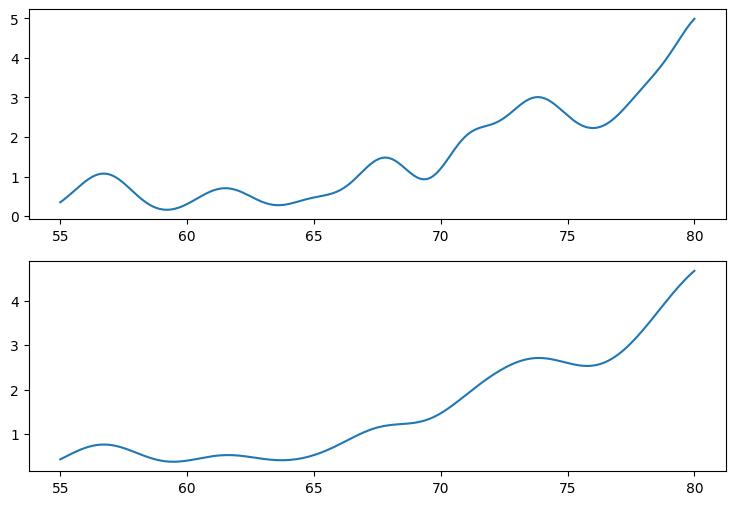

In [39]:
#Perform density estimation with a Gaussian kernel
gaussian1 = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=1.0)
gaussian1.fit(X)
log_scores1 = gaussian1.score_samples(grid)
guassian2 = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=1.5)
guassian2.fit(X)
log_scores2 = guassian2.score_samples(grid)
fig, axs = plt.subplots(2, 1)
axs[0].plot(grid, np.exp(log_scores1)*len(mydata['Glucose']))
axs[1].plot(grid, np.exp(log_scores2)*len(mydata['Glucose']))

#### Discussion

As it can be seen the bandwidth is picked automaticaly then kernel is not given one. Regarding the bandwiths for kernels it can be seen what for gausian the 1.0 is better than 1.5 as it shows more dynamic and chnages and data. 1.5 for naive estimator appears to be good resolution.



### Task 3: Comparison to a normal distribution

Compare one of the estimates you obtained above to a normal distribution with the appropriate mean and standard deviation, as computed in Task 1, by plotting them in a joint diagram. The probability density function for a normal distribution is given by

$p(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{(-\frac{(x-\mu)^2}{2\sigma^2})}$,

where $\sigma$ is the standard deviation and $\mu$ the mean. In Python, it's best to evaluate this with numpy on an array of $x$-values as

`np.exp(-(x-mu)**2 / 2 / sigma**2) / sigma / np.sqrt(2 * np.pi)`

In [43]:
mu = mydata['Glucose'].mean()
sigma = mydata['Glucose'].std()

mu_f = mydata['Glucose'].mean()

sigma_f = mydata['Glucose'].std()

p_f = np.exp(-(grid-mu_f)**2 / 2 / sigma_f**2) / sigma_f / np.sqrt(2 * np.pi)

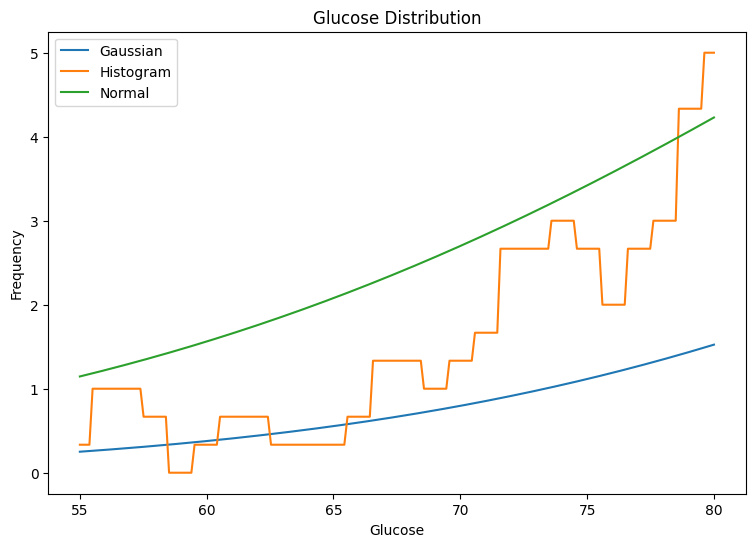

In [57]:
# plot the histogram and the density estimate from 0 to 200
plt.plot(grid, p_f * len(mydata))

plt.plot(grid, np.exp(log_scores2)*len(mydata['Glucose']))

plt.plot(grid, np.exp(-(grid-mu)**2 / 2 / sigma**2) / sigma / np.sqrt(2 * np.pi) * len(mydata))
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.legend(['Gaussian', 'Histogram', "Normal"])
plt.show()

# It can bee seen that both estimators are very similar to each other and they are also very similar to the histogram.
# The gaussian estimator is a little bit more accurate than the normal distribution estimator.